In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.datasets import imdb
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from keras.layers import LSTM

Using TensorFlow backend.


#### test RNN

In [2]:
model = Sequential([
    Embedding(10000, 32),
    SimpleRNN(32)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


#### parameters

In [3]:
max_features = 10000
maxlen = 500
batch_size = 32

#### read datasets

In [4]:
# copy imdb.npz from ../assignment_6/imbd.npz to current (assignment_7) directory, please
# Because I have written 'assignment_7/imbd.npz' in file .gitignore

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [5]:
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)
print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)

x_train.shape (25000, 500)
y_train.shape (25000,)
x_test.shape (25000, 500)
y_test.shape (25000,)


#### define plot function

In [6]:
def plot(acc, val_acc, title="Accuracy"):
    plt.plot(acc, label='Training {} '.format(title))
    plt.plot(val_acc, label='Validation {} '.format(title))
    plt.title('Training and validation {} '.format(title))
    plt.legend()
    plt.show()

#### define model 1

In [7]:
model = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


#### train model 1

In [8]:
history = model.fit(x_train, y_train,
          epochs=10, 
          batch_size=128,
          validation_split=0.2)

C:\Users\hhq12\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 831us/step - loss: 0.6323 - acc: 0.6250 - val_loss: 0.5091 - val_acc: 0.7698
Epoch 2/10
20000/20000 [==============================] - 18s 902us/step - loss: 0.3954 - acc: 0.8310 - val_loss: 0.3623 - val_acc: 0.8494
Epoch 3/10
20000/20000 [==============================] - 17s 871us/step - loss: 0.2792 - acc: 0.8908 - val_loss: 0.3582 - val_acc: 0.8522
Epoch 4/10
20000/20000 [==============================] - 17s 865us/step - loss: 0.2188 - acc: 0.9169 - val_loss: 0.8245 - val_acc: 0.7106
Epoch 5/10
20000/20000 [==============================] - 18s 882us/step - loss: 0.1622 - acc: 0.9403 - val_loss: 0.4987 - val_acc: 0.7926
Epoch 6/10
20000/20000 [==============================] - 18s 878us/step - loss: 0.1110 - acc: 0.9629 - val_loss: 0.4476 - val_acc: 0.8528
Epoch 7/10
20000/20000 [==============================] - 18s 879us/step - loss: 0.0727 - acc: 0.9768 - val_loss: 0.6

#### plot training history

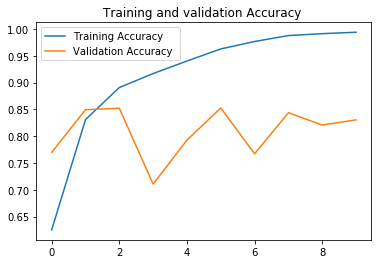

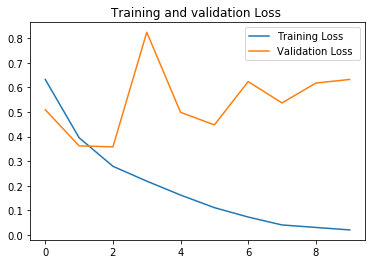

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plot(acc, val_acc)
plot(loss, val_loss, "Loss")

#### define model 2

In [10]:
model = Sequential([
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


#### train model 2

In [11]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

C:\Users\hhq12\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.5232 - acc: 0.7582 - val_loss: 0.3694 - val_acc: 0.8624
Epoch 2/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.2922 - acc: 0.8870 - val_loss: 0.2787 - val_acc: 0.8880
Epoch 3/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.2364 - acc: 0.9111 - val_loss: 0.3710 - val_acc: 0.8710
Epoch 4/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1958 - acc: 0.9272 - val_loss: 0.3116 - val_acc: 0.8896
Epoch 5/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1789 - acc: 0.9356 - val_loss: 0.3001 - val_acc: 0.8756
Epoch 6/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1609 - acc: 0.9416 - val_loss: 0.3333 - val_acc: 0.8840
Epoch 7/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1501 - acc: 0.9474 - val_loss: 0.3829 - val_acc:

#### plot training history

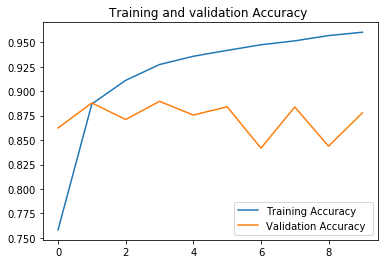

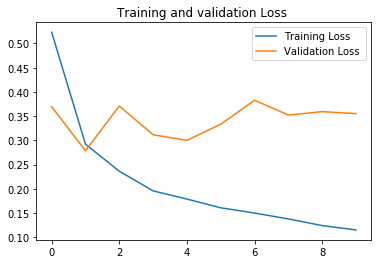

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plot(acc, val_acc)
plot(loss, val_loss, "Loss")